_Ce notebook est consacré à la mise en application du recuit simulé, un algorithme d'optimisation stochastique faisant partie des méthodes MCMC (Markov Chain Monte Carlo)._

# Projet 5 - Paysage accidenté

## Recuit simulé avec $f : \mathbb{R}^2 \rightarrow \mathbb{R}$

__Soit $D = [3, 3] \times [3, 3]$ et posons:
<br>$$f(x, y) = e^{\sin(50x)}+ \sin(60e^y) + \sin(70 \sin(x)) + \sin(\sin(80y)) - \sin(10(x + y)) +\frac {1} {4}(x^2 + y^2), \ (x, y) \in D.$$
<br>L'objectif est d'étudier la fonction $f$ en la visualisant puis de trouver, à l'aide du recuit simulé, une approximation de son minimum sur $D$.__

In [16]:
import numpy as np
import numpy.random as rd
from numpy.random import rand
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10) # Modification de la taille par défaut des graphiques affichés
np.random.seed(15) # On fixe le générateur de nombres aléatoires pour la reproductibilité des résultats

__1. Visualiser la courbe representative de la fonction: $ x \to f(x, 0.5), \ x \in [-3,3]$.__

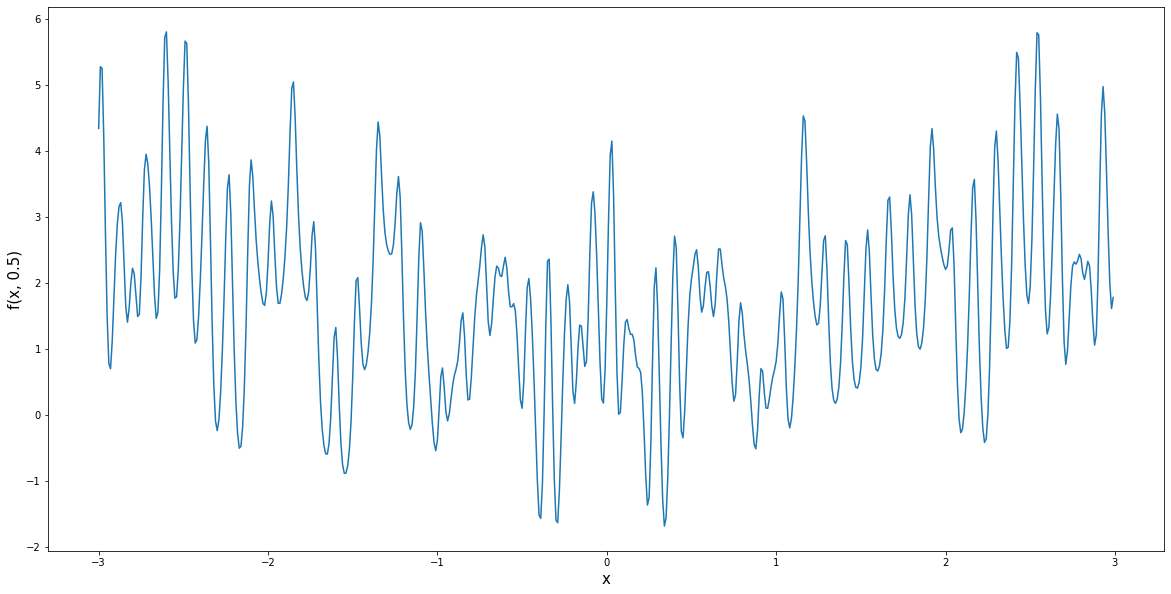

In [17]:
# Création de la fonction f
f = lambda x, y: np.exp(np.sin(50*x)) + np.sin(60*np.exp(y)) + np.sin(70*np.sin(x)) + np.sin(np.sin(80*y)) - np.sin(10*(x + y)) + (x**2 + y**2)/4

# On génère une suite de valeurs de x à passer en argument de f
x = np.arange(-3, 3, 0.01)

# Affichage de la courbe de la fonction
plt.plot(x, f(x, 0.5))
plt.xlabel('x', fontsize = 15)
plt.ylabel('f(x, 0.5)', fontsize = 15)
plt.show()

__2. Soit $a \in [3, 3]$. Posons $g_{a}(x) = f(x, a), \ x \in[3, 3]$ (une coupe de la fonction $f$ au niveau $y = a$).
<br>Visualiser, sur un même graphique des courbes représentatives de $g_a$ pour les valeurs de a variant de -3 à 3 (inclus) par le pas de 0.5 (une de ces courbes <br>était visualisée dans la question précédente).__

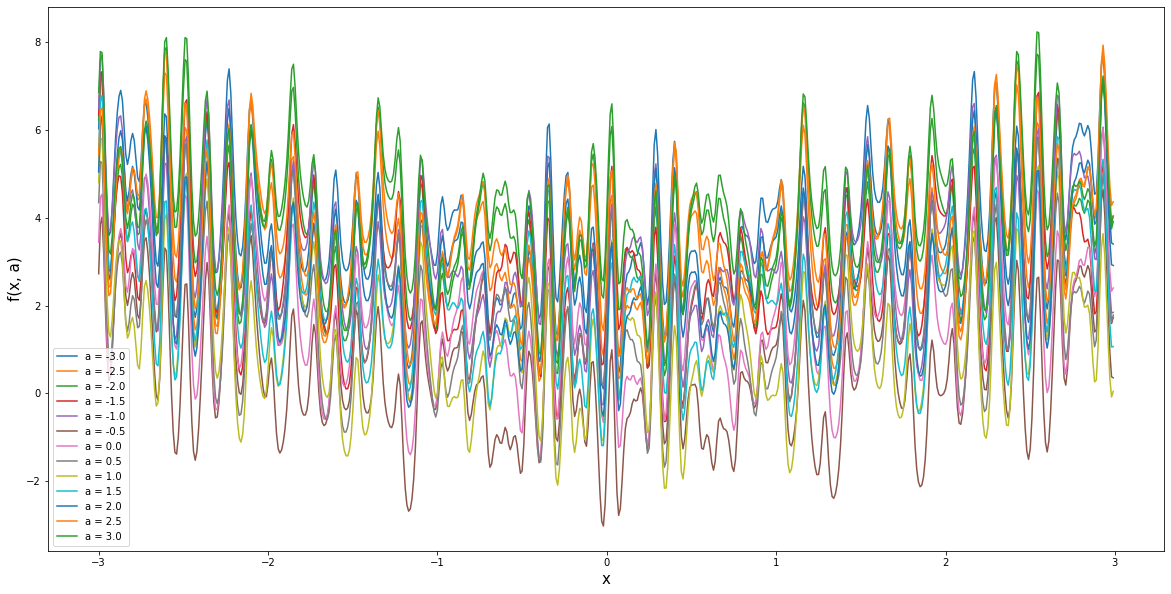

In [18]:
# On prépare une liste destinée à accueillir les différentes valeurs atteintes par g_a.
# Cette liste servira ensuite à trouver le minimum.
liste_g_a = []

# Pour chaque valeur de a comprise entre -3 et 3 (inclus) avec un pas de 0.5...

for a in np.arange(-3, 3.5, 0.5):
    
# ... on affiche le courbe représentative de f(x, a)...

    plt.plot(x, f(x, a), label = "a = {}".format(a))
    
# ... puis on ajoute la liste des valeurs de f(x,a), a étant fixé, à la liste globale.
# La conversion de l'array f(x,a) en liste est nécessaire pour obtenir une concaténation.

    liste_g_a += list(f(x,a)) 

plt.legend()
plt.xlabel('x', fontsize = 15)
plt.ylabel('f(x, a)', fontsize = 15)
plt.show()

Ces deux premières questions nous permettent de constater que la fonction $f$ est très volatile et atteint un grand nombre d'optima locaux. La méthode du recuit simulé semble toute indiquée pour déterminer le minimum global de cette fonction, ou du moins une valeur approchée.

__3. Pour une référence, calculer directement le minimum des tableaux *numpy* avec des valeurs de toutes les fonctions $g_{a}$ utilisées dans la question précédente.__

In [19]:
min(liste_g_a)

-3.018745566745073

__4. Calculer le minimum des valeurs de la fonction $g_a$  à l'aide d'un nuage de $N = 1000$ points choisis au hasard uniformément dans D.
<br>Utiliser plusieurs expériences pour déterminer la moyenne des minima. La valeur moyenne obtenue est-elle plus petite que dans la question 3 ?
<br>Même question pour $N = 10^4, 10^5 \ et \ 10^6$.__

In [20]:
# Pour chaque valeur de N, on génère 100 échantillons de N couples aléatoires choisis dans D.
# Pour chacun des ces échantillons, on calcule les N images de ces couples par f puis on enregistre
# la plus petite de ces images dans une liste L_min.
# On affiche ensuite la moyenne des 100 minima contenus dans L_min.

for N in [10**3, 10**4, 10**5, 10**6]:
    L_min = []
    for _ in range(100):
        random_x = rd.uniform(-3, 3, N)
        random_y = rd.uniform(-3, 3, N)
        L_min.append(min(f(random_x, random_y)))
    print("\nMoyenne des minima estimés avec {} points aléatoires: {}".format(N, np.mean(L_min)))


Moyenne des minima estimés avec 1000 points aléatoires: -2.3499285872125832

Moyenne des minima estimés avec 10000 points aléatoires: -2.8243591800161

Moyenne des minima estimés avec 100000 points aléatoires: -3.121015036427825

Moyenne des minima estimés avec 1000000 points aléatoires: -3.2671200204286737


On constate qu'on obtient une valeur minimale moyenne pour $f$ inférieure au minimum obtenu à la question 3 à condition de générer au moins $10^5$ points choisis aléatoirement dans $D$ et donc autant de valeurs prises par $f$.

__5. Visualiser une marche aléatoire de $N = 2000$ pas sur $D$ qui, à chaque instant $n = 0, 1, ..., N$, fait un pas au hasard selon la loi uniforme sur $[-0.5, 0.5] \times [-0.5, 0.5]$ et qui ne quitte jamais le domaine $D$ (les déplacements en dehors de $D$ sont rejetés).
<br>Visualiser aussi les valeurs de la fonction $f$ aux points visités par cette marche aléatoire.__

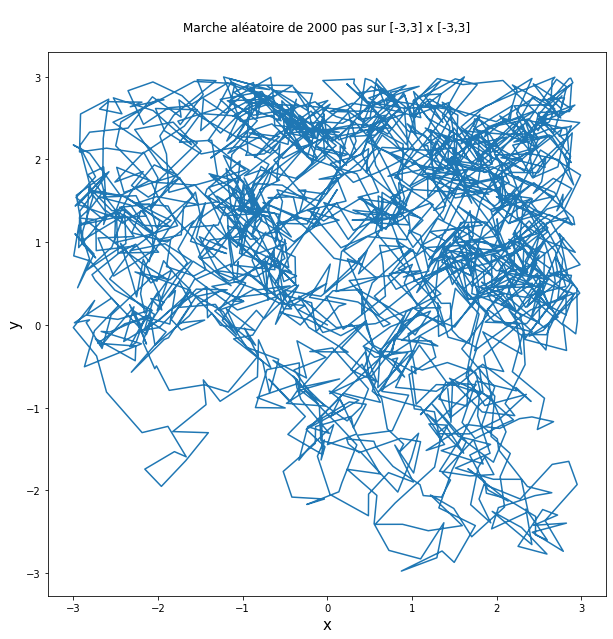

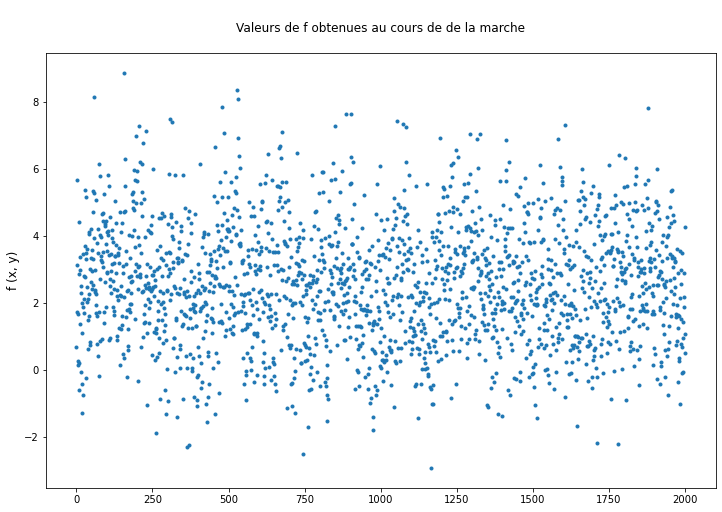

In [21]:
N = 2000 # Nombre de pas voulus
x_marche = [0] # Coordonnées initiales du "marcheur"
y_marche = [0]
for i in range(2000):
    pasX = rand() - 0.5 # rand() fournit une valeur aléatoire choisie uniformément entre 0 et 1
    pasY = rand() - 0.5 # On diminue cette valeur de 0.5 pour rester dans le domaine [-0.5,0.5]
# On teste par une boucle while nos valeurs de pas pour s'assurer que le marcheur ne sort pas de D ; 
# s'il en sort, on recalcule un pas aléatoire qu'on va ensuite restester, et ainsi de suite jusqu'à satisfaction.
    while not(-3 < x_marche[i] + pasX < 3 and -3 < y_marche[i] + pasY < 3):
        pasX = rand() - 0.5
        pasY = rand() - 0.5
# On ajoute finalement les nouvelles coordonnées du "marcheur" à la liste de ses positions passées.
    x_marche.append(x_marche[i] + pasX)
    y_marche.append(y_marche[i] + pasY)

plt.figure(figsize = (10,10))
plt.plot(x_marche, y_marche)
plt.xlabel("x", fontsize = 15)
plt.ylabel("y", fontsize = 15)
plt.title("\nMarche aléatoire de 2000 pas sur [-3,3] x [-3,3]\n", fontsize = 12)
plt.show()

f_marche = f(np.array(x_marche), np.array(y_marche))
plt.figure(figsize = (12,8))
plt.plot(f_marche, '.')
plt.ylabel("f (x, y)", fontsize = 12)
plt.title("\nValeurs de f obtenues au cours de de la marche\n", fontsize = 12)
plt.show()

Cette marche aléatoire servira de base à notre recuit simulé : l'algorithme consiste en effet à restreindre la marche pour l'orienter vers les minima locaux de la fonction et essayer d'en tirer un minimum global.

__6. Trouver une approximation du minimum de la fonction $f$ sur $D$ à l'aide d'un recuit simulé.
<br>Pensez à ajuster des paramètres de votre algorithme (schéma de températures, probabilités d'acceptation...) pour avoir une "bonne" exploration stochastique.
<br>Afficher l'évolution de la valeur courante de la fonction durant la recherche pour mettre en évidence ce "bon" caractère de l'exploration.__


Minimum estimé de la fonction f sur [-3,3]x[-3,3] : -3.304798874467475

Valeur trouvée pour x ~ -0.0248 et y ~ 0.21005



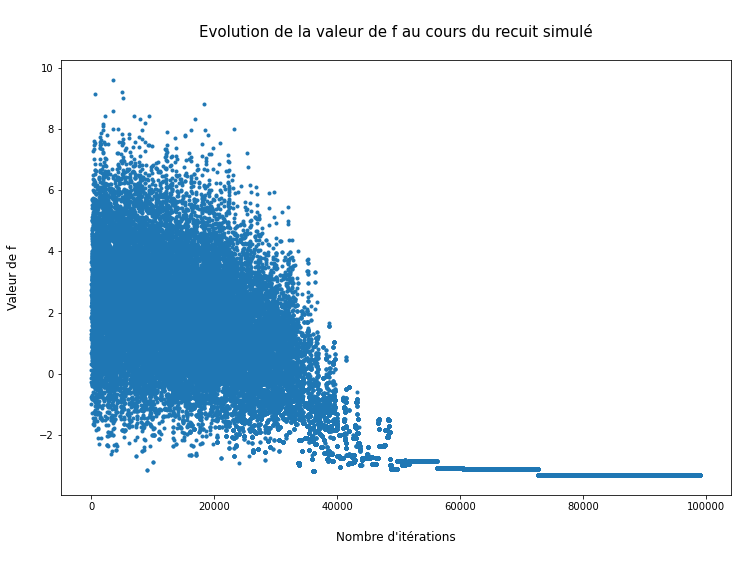

In [22]:
T = 20 # Température initiale du système

# On fixe arbitrairement des coordonnées de départ et on calcule son image par f afin d'obtenir une première valeur 
# candidate pour le minimum qui va nous servir d'élément de comparaison

x = 0
y = 0
f_min = f(x,y) 

# On crée également une liste destinée à contenir l'ensemble des valeurs atteintes par f au cours de l'exécution
# de l'algorithme.

L_energie = [f_min]

# On réutilise le code qui nous a permis de générer une marche aléatoire sur [-3,3], à la différence
# que la boucle ne s'achève plus après le calcul d'un nombre donné de valeurs mais lorsque la température
# passe en dessous d'un certain seuil.

while T >= 0.001:
    pasX = rand() - 0.5
    pasY = rand() - 0.5
    while not(-3 < x + pasX < 3 and -3 < y + pasY < 3):
        pasX = rand() - 0.5
        pasY = rand() - 0.5
        
# Si la nouvelle valeur de f obtenue aléatoirement grâce à notre code de marche est inférieure à sa 
# valeur courante, le couple qui a permis de l'atteindre est automatiquement sélectionné comme nouveau 
# couple de référence.

    if f(x + pasX, y + pasY) < f(x, y):
        x, y = x + pasX, y + pasY
        
    # Si de plus cette nouvelle valeur de f est la plus petite jamais obtenue, elle est enregistrée comme 
    # minimum provisoire, de même que les coordonnées qui ont permis de l'atteindre.

        if f(x, y) < f_min:
            x_min = x
            y_min = y
            f_min = f(x, y)
        
# Dans le cas où la valeur de f atteinte est supérieure à la valeur courante, on accepte le nouveau couple de
# coordonnées avec une probabilité qui diminue en même temps que la température du système, toutes choses 
# égales par ailleurs.
# Autrement dit, l'exploration stochastique du domaine sera plus intense au début du programme, ce qui nous évite
# de rester bloqué dans un minimum local, et se stabilisera progressivement en fin d'exécution.

    else:
        p_accept = np.exp((f(x, y) - f(x + pasX, y + pasY)) / T)
        if rand() <= p_accept:
            x, y = x + pasX, y + pasY
            
# Dans tous les cas, on ajoute la valeur courante de f à la liste des valeurs atteintes

    L_energie.append(f(x,y))
    
# On diminue lentement l'énergie avant de reprendre le processus du début.

    T = T * 0.9999
    
print("\nMinimum estimé de la fonction f sur [-3,3]x[-3,3] : {}".format(f_min))
print("\nValeur trouvée pour x ~ {} et y ~ {}\n".format(round(x_min, 5), round(y_min, 5)))

plt.figure(figsize = (12,8))
plt.plot(L_energie, '.')
plt.title("\nEvolution de la valeur de f au cours du recuit simulé\n", fontsize = 15)
plt.xlabel("\nNombre d'itérations\n", fontsize = 12)
plt.ylabel("Valeur de f\n", fontsize = 12)
plt.show()

L'algorithme fournit en général un minimum inférieur à - 3.27.

__On voit ici l'intérêt de cet algorithme qui permet d'obtenir une valeur acceptable pour le minimum de $f$ en moins de 100 000 itérations ; même limité au domaine $D$ avec un pas de $10^{-5}$, une exploration exhaustive des valeurs prises par la fonction $f$ nécessiterait de calculer l'image par $f$ de 360 milliards de couples $(x, y)$ pour trouver une approximation du minimum.__